## Transfer Learning resnet50 using Keras

In [1]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# resize all the images
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
vaild_path = 'Datasets/test'

In [3]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [6]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                           target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\satya\AppData\Local\Temp\ipykernel_12968\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 14s 7s/step - loss: 7.3947 - accuracy: 0.2969 - val_loss: 8.5657 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 9s 6s/step - loss: 4.6110 - accuracy: 0.4219 - val_loss: 4.0468 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 10s 7s/step - loss: 4.7264 - accuracy: 0.3281 - val_loss: 3.1665 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 10s 7s/step - loss: 2.6690 - accuracy: 0.5000 - val_loss: 2.6790 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 9s 7s/step - loss: 2.2822 - accuracy: 0.4062 - val_loss: 1.5820 - val_accuracy: 0.3966
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 0.9348 - accuracy: 0.5781 - val_loss: 1.8492 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 9s 7s/step - loss: 1.7545 - accuracy: 0.6719 - val_loss: 2.0675 - val_accuracy: 0.4483
Epoch 8/50
2/2 [======================

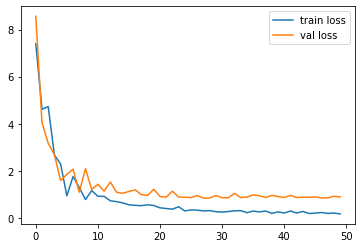

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

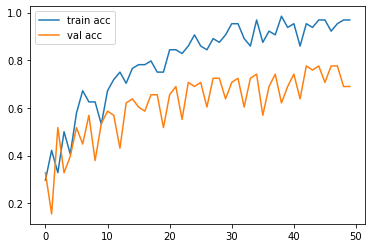

In [16]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

2/2 [==============================] - 7s 3s/step


In [19]:
y_pred

array([[3.5121062e-01, 5.9086484e-01, 5.7924584e-02],
       [9.6640801e-01, 1.1094894e-02, 2.2497065e-02],
       [6.7122877e-02, 1.4228678e-03, 9.3145424e-01],
       [2.1017745e-02, 4.6112144e-01, 5.1786083e-01],
       [2.4262004e-01, 3.7490827e-01, 3.8247171e-01],
       [5.4632458e-03, 9.0352279e-01, 9.1013908e-02],
       [6.5497831e-02, 7.6764679e-01, 1.6685535e-01],
       [1.5304027e-02, 8.6423653e-01, 1.2045938e-01],
       [2.5190914e-02, 9.0939236e-01, 6.5416798e-02],
       [1.8102210e-04, 9.9106735e-01, 8.7516783e-03],
       [6.7764814e-03, 4.4201979e-01, 5.5120367e-01],
       [2.0146769e-02, 9.7784925e-01, 2.0039724e-03],
       [7.5475889e-01, 1.1529318e-02, 2.3371181e-01],
       [1.3002835e-01, 4.0272087e-01, 4.6725070e-01],
       [1.0398173e-03, 9.6709841e-01, 3.1861767e-02],
       [2.3771043e-01, 4.9916437e-01, 2.6312521e-01],
       [9.2701429e-01, 3.9438356e-02, 3.3547394e-02],
       [1.0211217e-01, 8.6551046e-01, 3.2377291e-02],
       [5.4303044e-01, 2.035

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2,
       0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model('model_resnet50.h5')

In [24]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.4935660e-12, 6.2962895e-18, 1.0000000e+00]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 158ms/step


In [30]:
a==1

array([False])

In [31]:
img_data

array([[[[148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         ...,
         [ 68.061  ,  70.221  ,  72.32   ],
         [ 89.061  ,  91.221  ,  93.32   ],
         [115.061  , 117.221  , 119.32   ]],

        [[148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         ...,
         [133.061  , 128.22101, 121.32   ],
         [131.061  , 126.221  , 119.32   ],
         [130.061  , 125.221  , 118.32   ]],

        [[148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         [148.061  , 135.22101, 128.32   ],
         ...,
         [144.061  , 132.22101, 116.32   ],
         [146.061  , 134.22101, 118.32   ],
         [146.061  , 134.22101, 118.32   ]],

        ...,

        [[125.061  ,  90.221  ,  65.32   ],
         [125.061  ,  89.221  ,  66.32   ],
         [125.061  ,  89.221  ,  66.32   ],
         ...,
